In [116]:
import sys
import os
project_root = os.path.abspath("..")
sys.path.append(os.path.join(project_root, "src"))

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


In [118]:
dataset_link = "danilzyryanov/crime-in-berlin-2012-2019" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/crime-in-berlin-2012-2019' already exists with files. Skipping download (replace=False).


In [119]:
files

['Berlin_crimes.csv']

In [120]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.tail()




,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
1195,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728
1196,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986
1197,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212
1198,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31,218
1199,2019,Reinickendorf,129900,"Bezirk (Rd), nicht zuzuordnen",3,2,14,7,4,59,0,7,15,0,1,0,7,3,9,21


<Axes: xlabel='Year'>

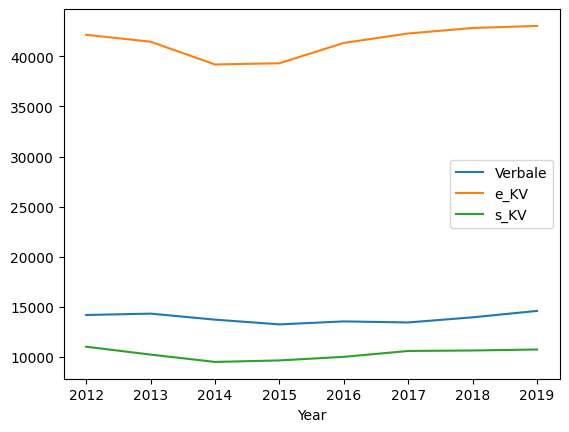

In [137]:
#Arbeitshyptose: Übergang von eher "beruhigenden" Heroin zu aufputschenden Amphetaminen führt zu mehr Roheitsdelikten
#Verbalattacken, S_KV und e_KV werden zu Roheitsdelikten zusammengefasst
df_Roheits=pd.DataFrame()
df_Roheits["Verbale"]=df.groupby("Year")["Threat"].sum()        ##Verbale Bedrohung/Nötigung
df_Roheits["e_KV"]=df.groupby("Year")["Injury"].sum()           ##Übliche KV mit eher leichteren Verletzungen (Kein Krankenhaus)
df_Roheits["s_KV"]=df.groupby("Year")["Agg_assault"].sum()      ##Schwere körperliche Angriffe(Wahrscheinlich die Krankenhaus erfordern)
df_Roheits

df_Roheits["Summe"]=df_Roheits["Verbale"]+df_Roheits["e_KV"]+df_Roheits["s_KV"]
df_Roheits[["Verbale","e_KV","s_KV"]].plot()

#df_crime["Drogen"] = df.groupby("Year")["Drugs"].sum()                      
#df_crime["Aggression"]= df.groupby("Year")["Agg_assault"].sum()
#df_crime


In [122]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(1200, 20)

'Description'

,count,mean,std,min,25%,50%,75%,max
Year,1200.0,2015.50,2.29,2012.0,2013.75,2015.5,2017.25,2019.0
Code,1200.0,67022.79,34813.75,10111.0,40101.00,70151.5,90520.00,129900.0
Robbery,1200.0,34.23,37.09,0.0,10.00,22.0,42.00,242.0
Street_robbery,1200.0,18.74,22.17,0.0,5.00,11.0,23.00,169.0
Injury,1200.0,276.33,243.70,0.0,108.00,204.5,361.00,1966.0
Agg_assault,1200.0,68.75,71.11,0.0,22.00,44.0,86.00,500.0
Threat,1200.0,92.58,68.46,0.0,42.00,75.0,124.00,420.0
Theft,1200.0,1492.31,1364.44,17.0,639.75,1100.0,2019.75,12479.0
Car,1200.0,42.51,28.71,0.0,22.00,37.0,57.00,197.0
From_car,1200.0,215.28,150.03,1.0,109.00,186.0,291.00,876.0


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Year,int64,0,8,"[2013, 2019, 2017]"
District,object,0,12,"[Pankow, Tempelhof-Schöneberg, Lichtenberg]"
Code,int64,0,150,"[20506, 70606, 40514]"
Location,object,0,150,"[Falkenhagener Feld, MV 2 - Rollbergsiedlung, ..."
Robbery,int64,0,149,"[0, 6, 66]"
Street_robbery,int64,0,99,"[5, 16, 68]"
Injury,int64,0,556,"[173, 63, 145]"
Agg_assault,int64,0,243,"[199, 354, 3]"
Threat,int64,0,263,"[92, 12, 2]"
Theft,int64,0,985,"[1262, 2909, 3870]"


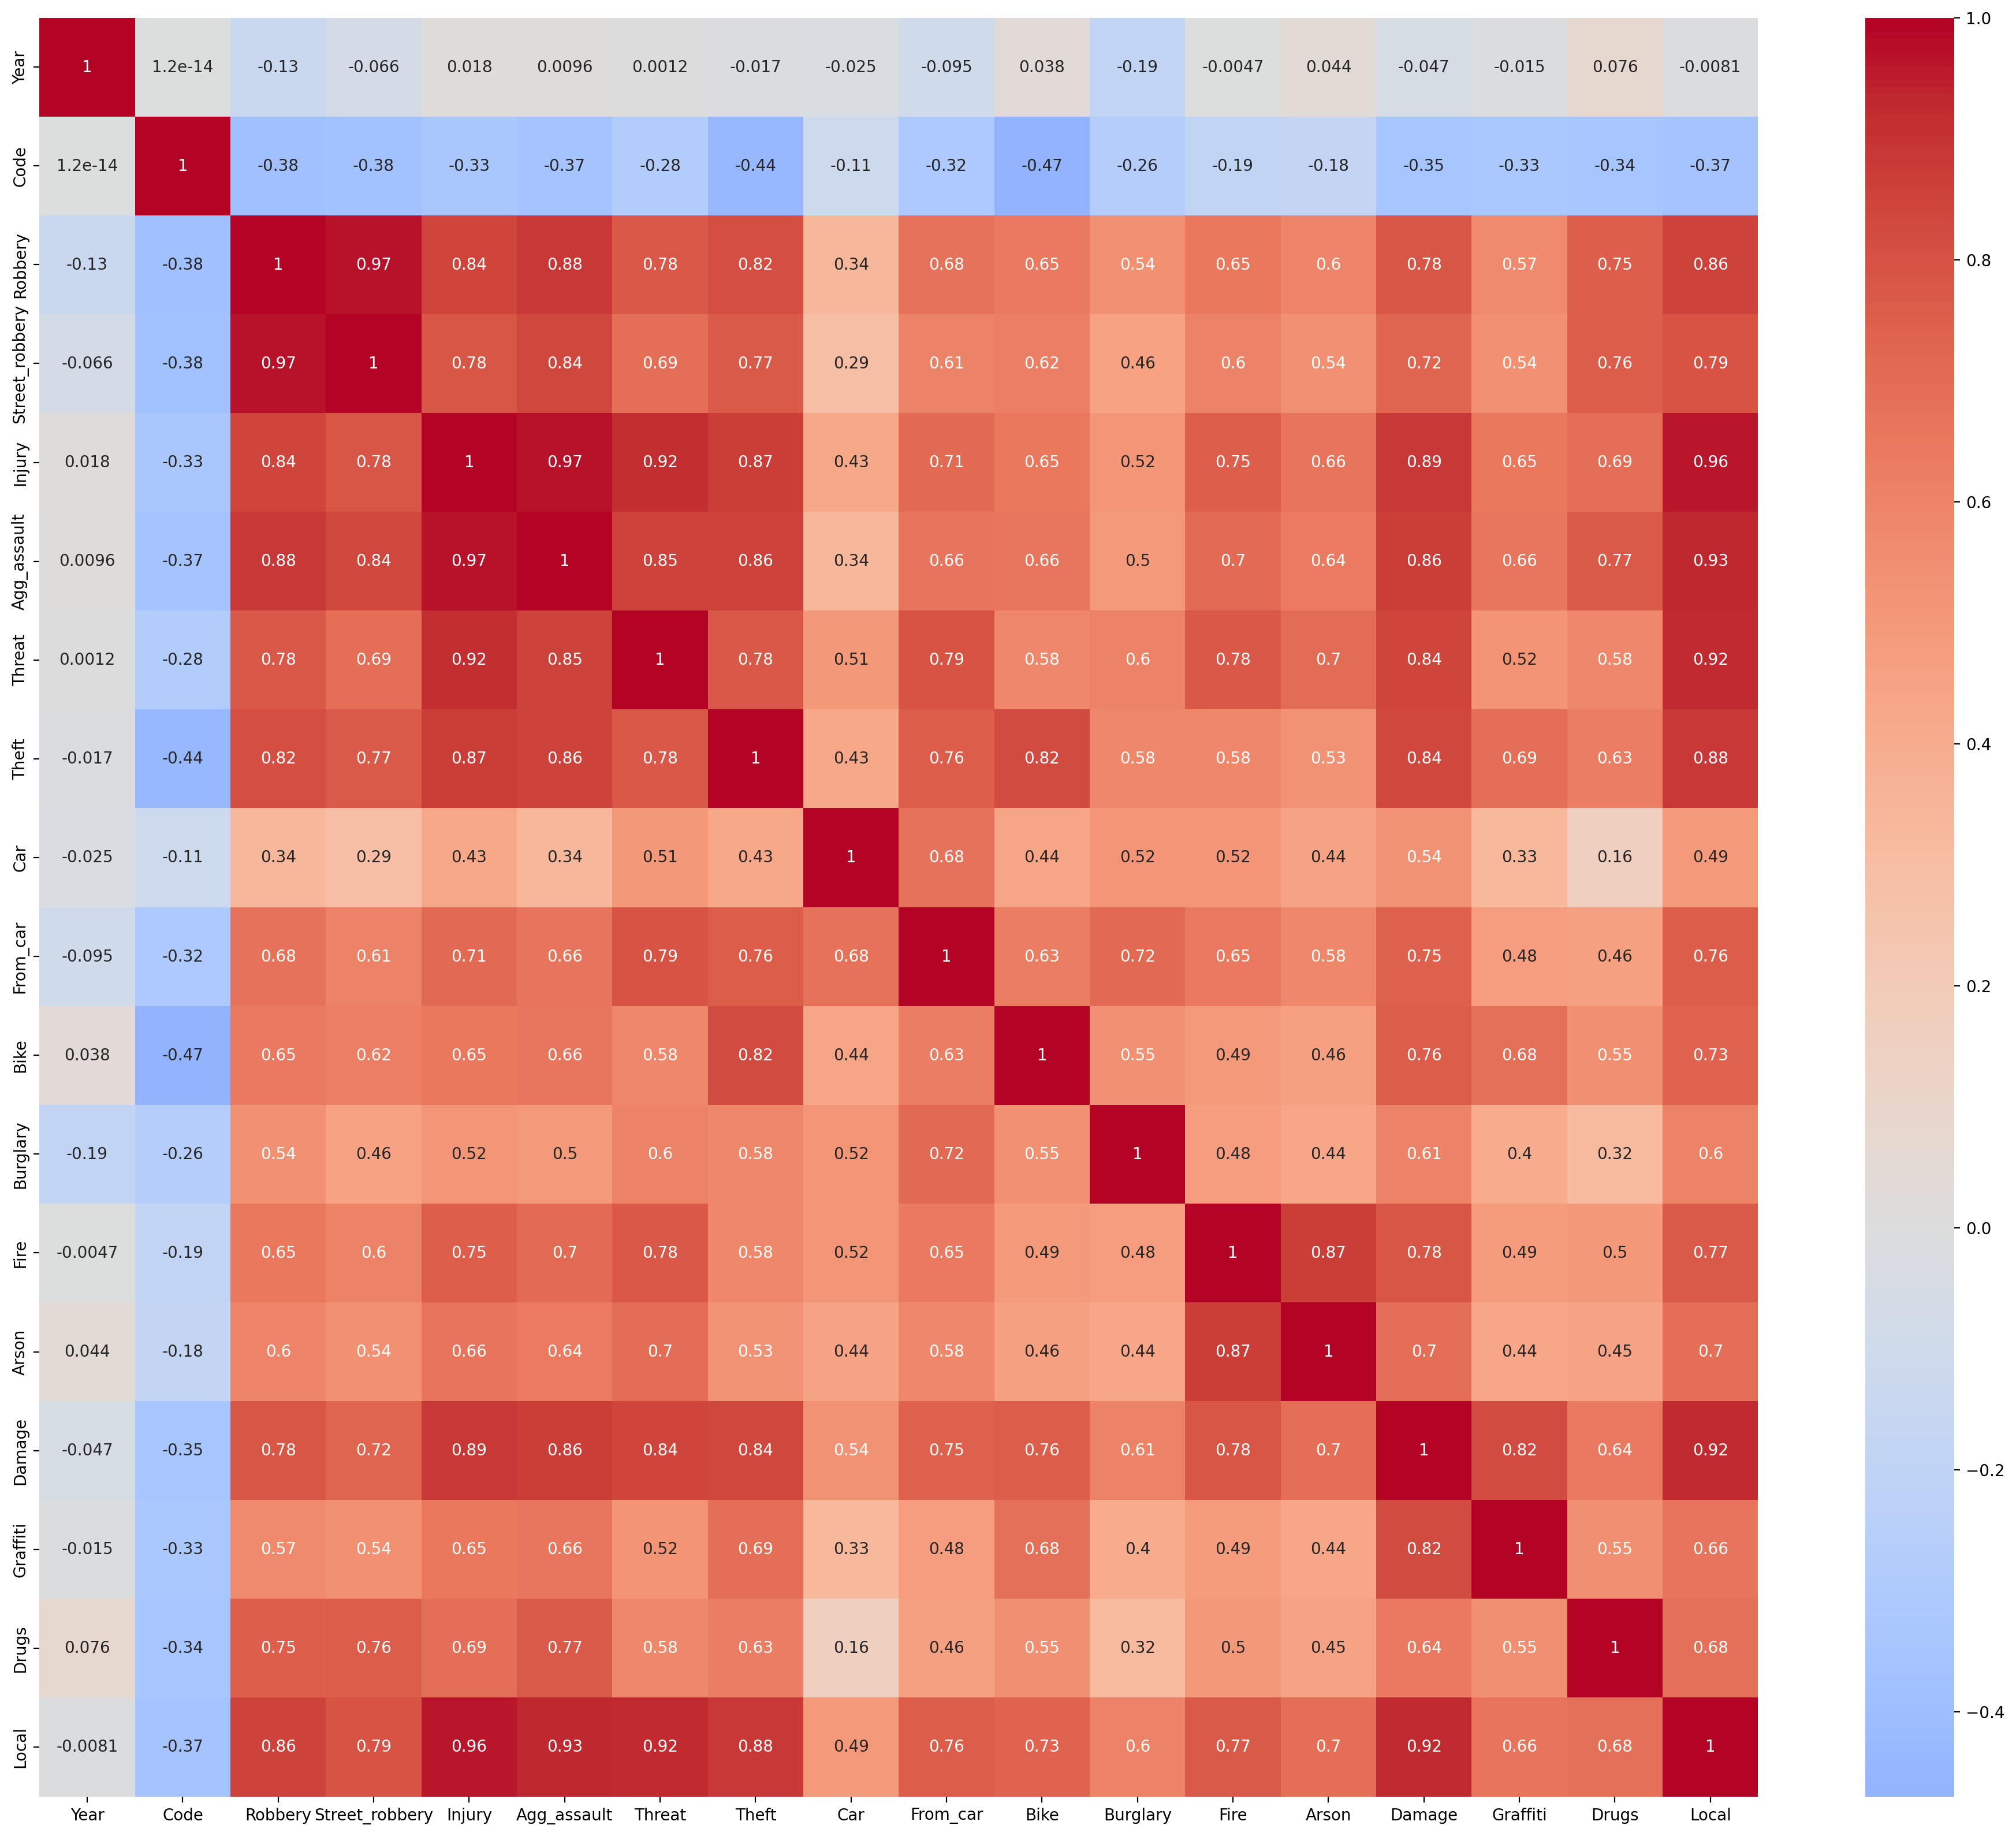

In [123]:
fig, ax = plt.subplots(figsize=(24, 20), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);